In [65]:
###############################################################
#Engenharia de Sistemas - UFMG - 2021/1
#Sistemas nebulosos - TP2
#Letícia Alvarenga Machado - 2017111427
#Olga Camila Teodoro de Rezende Lara - 2018104106 
###############################################################


## Parte 1 - Questões práticas

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math
import skfuzzy as fuzz
from matplotlib import cm

### Questão 3 - Plote as funções de pertinências para os valores linguísticos 
- mu_young(x) = gaussian(x, 0, 20)
- mu_old(x) = gaussian(x, 100, 30)

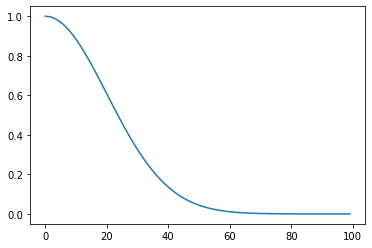

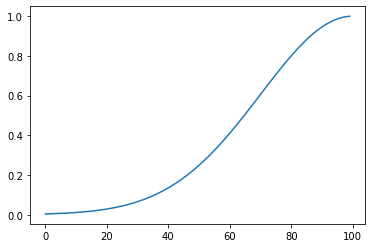

In [67]:
## Foi definido a função gaussian com parâmetros X, c, sigma 
## e após isso, definimos o intervalo de 0 a 100 (por ser uma idade) 
## e parametrizamos os valores solicitados na questão, conforme mostrado abaixo. 

def gaussian(X, c, sigma):
    Y = []
    for x in X:
        constante = ((x-c)/sigma) ** 2
        y = math.exp((-0.5)*constante)    
        
        Y.append(y)
    
    return Y


X = list(np.arange(0,100,1))

mu_young = gaussian(X, 0, 20)
mu_old = gaussian(X, 100, 30)

plt.plot(X,mu_young)
plt.show()

plt.plot(X,mu_old)
plt.show()

### Questão 4 - Usando as funções de pertinência da questão 3, obtenha as seguintes funções de pertinência para os termos não-primários: 
- (a) not very young and not very old;
- (b) very young and very old;

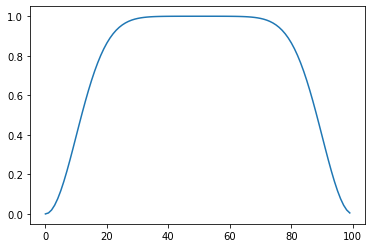

In [68]:
## (a) not very young and not very old;

## Definimos a função de pertinência notVeryYoung_and_notVeryOld que "concatena" as duas idades passadas
## E no final, subtraímos 1 do resultado, já que a função é "not" o resultado.
## Para a escolha dos parâmetros, definimos os valores do sigma das idades mu_young e mu_old como sendo 10
## para mostrarmos valores mais extremos. E, após isso foi plotado o resultado.

def notVeryYoung_and_notVeryOld(mu_young, mu_old, intervalo):
    result = []
    for index in range(intervalo):
        result_current = mu_young[index] + mu_old[index]
        not_result_current = 1 - result_current 
        result.append(not_result_current)
    return result
        
    
    
mu_young = gaussian(X, 0, 10)
mu_old = gaussian(X, 100, 10)
resultado = notVeryYoung_and_notVeryOld(mu_young, mu_old, 100)
    
plt.plot(X,resultado)
plt.show()



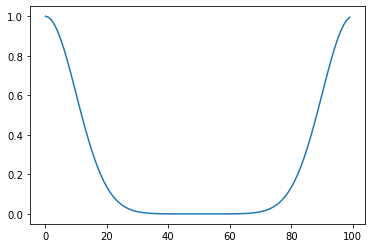

In [69]:
## (b) very young and very old;
## Definimos a função de pertinência veryYoung_and_veryOld que "concatena" as duas idades passadas.
## Para a escolha dos parâmetros, definimos os valores do sigma das idades mu_young e mu_old como sendo 10
## para mostrarmos valores mais extremos. E, após isso foi plotado o resultado.

def veryYoung_and_veryOld(mu_young, mu_old, intervalo):    
    result = []
    for index in range(intervalo):
        result_current = mu_young[index] + mu_old[index]
        result.append(result_current)
    return result
        
    
mu_young = gaussian(X, 0, 10)
mu_old = gaussian(X, 100, 10)
resultado = veryYoung_and_veryOld(mu_young, mu_old, 100)
    
plt.plot(X,resultado)
plt.show()



## Parte 2 - Questões práticas

### Questão 3 - Função para aproximar o y = seno(x), com x definido no intervalo de [0, 2π], empregando inferência de Sugeno  com consequentes de ordem 1, yj = pjx + qj, onde j é o índice que representa a regra.

In [70]:
## Ideia geral do código a seguir:
    
## 1º) Definimos a função que desejamos aproximar, com seus intervalos de análise
## 2º) Descobrimos quais retas vão ser utilizadas para a aproximação de acordo com a quantidade de regras
## 3º) Calculamos o valor para cada ponto
## 4º) Definimos a função de pertinência desejada nos intervalos a serem analisados
## 5º) Geramos o Ys 
## 6º) Plotamos o resultado
## 7º) Calculamos o erro médio quadrático

#### Funções definidas para serem utilizadas na questão 3

- A função gera_Yi(x, p, q) calcula o valor de y em cada ponto x, de acordo com a inclinação da reta 
   e deslocamento (y = px+q)
- A função gera_funcao_pertinencia_triangular(parametros) retorna o valor de mi para cada x, utilizando
   a função de pertinência triangular
- A função gera_funcao_pertinencia_gaussiana(parametros) retorna o valor de mi para cada x, utilizando 
   a função de pertinência gaussiana
- A função gera_Ys(yi, mi) calcula o valor de Ys que é dado pela multiplicação dos yi pelos pesos, 
   dividido pela soma dos pesos
- A função EQM(saidaEsperada, saidaObtida) calcula o erro quadrático médio de acordo com a expressão dada
   no exercício
- A função plot(parâmetros) plota o gráfico resultante, com as funções de pertinência, valor 
   esperado e valor obtido


In [71]:
def gera_Yi(x, p, q):
    y = np.array([(i * p + q) for i in x])
    return y

def gera_funcao_pertinencia_triangular(valoresIntervalo, inicio, fim, direc):
    dist = 0.5    
    sp = 0.5
    if direc == 'right':
        fim -= dist
        triangulo_fimIntervalo_abc = [fim-sp, fim, fim+sp]
        sinal = fuzz.trimf(valoresIntervalo, triangulo_fimIntervalo_abc)
    elif direc == 'left':
        inicio += dist
        triangulo_inicioIntervalo_abc = [inicio-sp, inicio, inicio+sp]
        sinal = fuzz.trimf(valoresIntervalo, triangulo_inicioIntervalo_abc)
    else:
        fim -= dist
        inicio += dist        
        triangulo_inicioIntervalo_abc = [inicio-sp, inicio, inicio+sp]
        triangulo_fimIntervalo_abc = [fim-sp, fim, fim+sp]
        sinal = fuzz.trimf(valoresIntervalo, triangulo_inicioIntervalo_abc) + fuzz.trimf(valoresIntervalo, triangulo_fimIntervalo_abc)                
        
    ai_const = valoresIntervalo.copy()
    ai_const = np.array([1 if i>= inicio and i <= fim else 0 for i in ai_const])
    mi = ai_const + sinal
    mi = np.array([1 if i > 1 else i for i in mi])
    return mi

def gera_funcao_pertinencia_gaussiana(valoresIntervalo, inicio, fim, direc):
    dist = 0.5    
    sp = 0.5 
    if direc == 'right':
        fim -= dist
        gauss_fimIntervalo = [fim-sp, fim, fim+sp]
        sinal = fuzz.gaussmf(valoresIntervalo, gauss_fimIntervalo[1], 0.5)
    elif direc == 'left':    
        inicio += dist
        gauss_inicioIntervalo = [inicio-sp, inicio, inicio+sp]
        sinal = fuzz.gaussmf(valoresIntervalo, gauss_inicioIntervalo[1], 0.5)
    else:
        inicio += dist
        fim -= dist
        gauss_inicioIntervalo = [inicio-sp, inicio, inicio+sp]
        gauss_fimIntervalo = [fim-sp, fim, fim+sp]        
        sinal = fuzz.gaussmf(valoresIntervalo, gauss_inicioIntervalo[1], 0.5) + fuzz.gaussmf(valoresIntervalo, gauss_fimIntervalo[1], 0.5)    
        
        
    ai_const = valoresIntervalo.copy()
    ai_const = np.array([1 if i>= inicio and i<= fim else 0 for i in ai_const])
    mi = ai_const + sinal
    mi = np.array([1 if i>1 else i for i in mi])
    return mi

def gera_Ys(yi , mi):
    qtd_regras = len(yi)
    qtd_amostras = len(yi[0])
    
    Ys = []
    
    for amostra in range(qtd_amostras):
        ys_atual = 0
        pesos = 0
        for regra in range(qtd_regras):
            pesos += mi[regra][amostra]
            ys_atual += mi[regra][amostra] * yi[regra][amostra]
        
        Ys.append(ys_atual/pesos)
    return np.array(Ys)

def EQM(saidaEsperada, saidaObtida):
    return np.mean((saidaEsperada - saidaObtida)**2)

def plot(intervalo_x, yEsperado, yObtido, mi, yi):
    for i, mi_ in enumerate(mi):
        plt.plot(intervalo_x, mi_, label= "mi"+str(i+1))
    plt.plot(intervalo_x, yEsperado, label= "seno(x)")
    plt.plot(intervalo_x, yObtido, label= "Ys", marker= ".")
    plt.legend(loc= "upper right")
    plt.show()


In [72]:
## Definindo o valor da função original: y = seno(x), com x definido no intervalo de [0, 2π]
intervalo_inicio_x = 0
intervalo_fim_x = 2*np.pi
step = 50
entrada_x = np.linspace(intervalo_inicio_x, intervalo_fim_x, step)
seno_x = np.sin(entrada_x)

#### Quantidade de regras de pertinência: 3

Com apenas 3 regras de pertinência, dá para ver a "característica" da curva desejada, mas a aproximação não é tão boa. 
O erro quadrático médio (eqm) tanto da triangular, quanto da gaussiana ficam relativamente altos, conforme vemos abaixo:

In [73]:
## y1 = 2*x/pi
p1 = 2/np.pi
q1 = 0
y1 = gera_Yi(entrada_x.copy(), p1, q1)

## y2 = -2*x/pi + 2
p2 = -2/np.pi
q2 = 2
y2 = gera_Yi(entrada_x.copy(), p2, q2)

## y3 = 2*x/pi - 4
p3 = 2/np.pi
q3 = -4
y3 = gera_Yi(entrada_x.copy(), p3, q3)

yi = [y1,y2,y3]


## Definimos aqui os limites inferiores e superiores de cada intervalo da função de pertinência

limite_inferior_1 = 0
limite_superior_1 = np.pi/2
limite_inferior_2 = np.pi/2
limite_superior_2 = 3*np.pi/2
limite_inferior_3 = 3*np.pi/2
limite_superior_3 = 2*np.pi



Função de pertinência do tipo: Triangular

Aproximação triangular: 


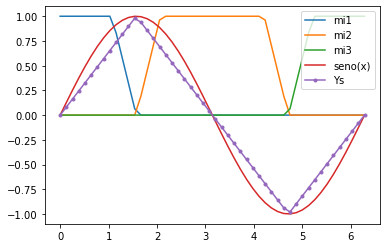

Erro quadrático médio EQM: 0.02231


In [74]:
## Agora, após definido os valores de y1, y2, y3, obtemos a função de pertinência do tipo triangular para cada uma das 
## retas escolhidas, ou seja mi1, mi2 e mi3

mi1 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_1, limite_superior_1, direc = 'right')
mi2 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_2, limite_superior_2, direc = 'both')
mi3 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_3, limite_superior_3, direc = 'left')
mi = [mi1, mi2, mi3]

Ys = gera_Ys(yi, mi)
eqm = EQM(seno_x, Ys)

print('Aproximação triangular: ')
plot(entrada_x, seno_x, Ys, mi, yi)
print('Erro quadrático médio EQM: {:.5f}'.format(eqm))



Função de pertinência do tipo: Gaussiana

Aproximação gaussiana: 


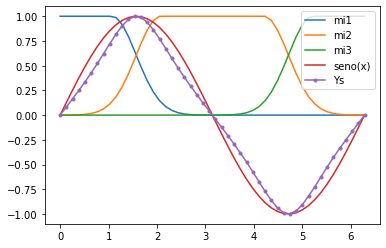

Erro quadrático médio EQM: 0.01304


In [75]:
mi1 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_1, limite_superior_1, direc = 'right')
mi2 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_2, limite_superior_2, direc = 'both')
mi3 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_3, limite_superior_3, direc = 'left')
mi = [mi1, mi2, mi3]

Ys = gera_Ys(yi, mi)
eqm = EQM(seno_x, Ys)

print('Aproximação gaussiana: ')
plot(entrada_x, seno_x, Ys, mi, yi)
print('Erro quadrático médio EQM: {:.5f}'.format(eqm))



#### Quantidade de regras de pertinência: 5

Já com 5 regras de pertinência, por se ter mais pontos, observa-se que a aproximação é melhor. Devido a função desejada ser a função seno(x), a gaussiana se aproxima melhor da função seno do que a triangular e isso, implica que com apenas 5 regras de pertinência, a função gaussiana já praticamente se torna a função desejada. 
É possível comparar o erro quadrático médio das funções de pertinência triangular e gaussiana, onde vemos que a função triangular tem um erro bem grande quando comparado com a gaussiana.

In [76]:
## y1 = 2.598*x/pi
p1 = 2.598/np.pi
q1 = 0
y1 = gera_Yi(entrada_x.copy(), p1, q1)

## y2 = 0.866
p2 = 0
q2 = 0.866
y2 = gera_Yi(entrada_x.copy(), p2, q2)

## y3 = -2.598x/pi - 4
p3 = -2.598/np.pi
q3 = 2.598
y3 = gera_Yi(entrada_x.copy(), p3, q3)

## y4 = -0.866
p4 = 0
q4 = -0.866
y4 = gera_Yi(entrada_x.copy(), p4, q4)

## y5 = 2.598x/pi - 5.196
p5 = 2.598/np.pi
q5 = -5.196
y5 = gera_Yi(entrada_x.copy(), p5, q5)


yi = [y1,y2,y3,y4,y5]


limite_inferior_1 = 0
limite_superior_1 = np.pi/3
limite_inferior_2 = np.pi/3
limite_superior_2 = 2*np.pi/3
limite_inferior_3 = 2*np.pi/3
limite_superior_3 = 4*np.pi/3
limite_inferior_4 = 4*np.pi/3
limite_superior_4 = 5*np.pi/3
limite_inferior_5 = 5*np.pi/3
limite_superior_5 = 2*np.pi



Função de pertinência do tipo: Triangular

Aproximação triangular: 


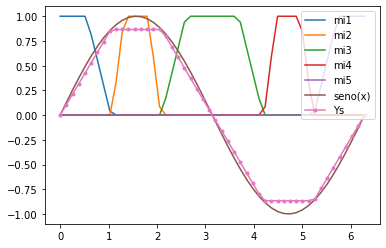

Erro quadrático médio EQM: 0.00468


In [77]:
mi1 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_1, limite_superior_1, direc = 'right')
mi2 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_2, limite_superior_2, direc = 'both')
mi3 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_3, limite_superior_3, direc = 'both')
mi4 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_4, limite_superior_4, direc = 'both')
mi5 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_5, limite_superior_5, direc = 'left')
mi = [mi1, mi2, mi3, mi4, mi5]


Ys = gera_Ys(yi, mi)
eqm = EQM(seno_x, Ys)

print('Aproximação triangular: ')
plot(entrada_x, seno_x, Ys, mi, yi)
print('Erro quadrático médio EQM: {:.5f}'.format(eqm))

Função de pertinência do tipo: Gaussiana

Aproximação gaussiana: 


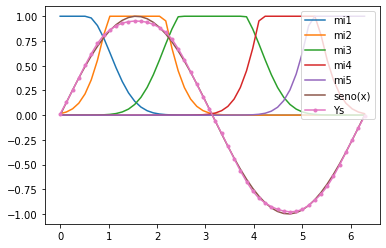

Erro quadrático médio EQM: 0.00038


In [78]:
mi1 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_1, limite_superior_1, direc = 'right')
mi2 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_2, limite_superior_2, direc = 'both')
mi3 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_3, limite_superior_3, direc = 'both')
mi4 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_4, limite_superior_4, direc = 'both')
mi5 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_5, limite_superior_5, direc = 'both')
mi = [mi1, mi2, mi3, mi4, mi5]


Ys = gera_Ys(yi, mi)
eqm = EQM(seno_x, Ys)

print('Aproximação gaussiana: ')
plot(entrada_x, seno_x, Ys, mi, yi)
print('Erro quadrático médio EQM: {:.5f}'.format(eqm))

#### Quantidade de regras de pertinência: 10


Por fim, com 10 regras de pertinência, com a mesma ideia de que se tem mais pontos, a aproximação é bem melhor do que nos dois outros casos. Porém, agora dá para perceber que tanto a função de pertinência gaussiana quanto a triangular se aproxima mais da função objetivo (seno(x)).
O EQM da triangular e da gaussiana dá para ver abaixo:

In [79]:
## y1 = 2.598*x/pi
p1 = 2.598/np.pi
q1 = 0
y1 = gera_Yi(entrada_x.copy(), p1, q1)

## y2 = 0.256x + 0.62
p2 = 0.256
q2 = 0.62
y2 = gera_Yi(entrada_x.copy(), p2, q2)

## y3 = -0.256x + 1.45
p3 = -0.256
q3 = 1.45
y3 = gera_Yi(entrada_x.copy(), p3, q3)

## y4 = -2x/pi + 2.196
p4 = -2/np.pi
q4 = 2.196
y4 = gera_Yi(entrada_x.copy(), p4, q4)

## y5 = -3x/pi - 3
p5 = -3/np.pi
q5 = 3
y5 = gera_Yi(entrada_x.copy(), p5, q5)

## y6 = -3x/pi - 3
p6 = -3/np.pi
q6 = 3
y6 = gera_Yi(entrada_x.copy(), p6, q6)

## y7 = -2.196x/pi + 2
p7 = -2.196/np.pi
q7 = 2
y7 = gera_Yi(entrada_x.copy(), p7, q7)

## y7 = -2.196x/pi + 2
p8 = -0.256
q8 = 0.15
y8 = gera_Yi(entrada_x.copy(), p8, q8)

## y7 = 0.256x - 2.256
p9 = 0.256
q9 = -2.256
y9 = gera_Yi(entrada_x.copy(), p9, q9)

## y7 = 2.598x/pi - 5.256
p10 = 2.598/np.pi
q10 = -5.256
y10 = gera_Yi(entrada_x.copy(), p10, q10)

yi = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10]



limite_inferior_1 = 0
limite_superior_1 = np.pi/3
limite_inferior_2 = np.pi/3
limite_superior_2 = np.pi/2
limite_inferior_3 = np.pi/2
limite_superior_3 = 2*np.pi/3
limite_inferior_4 = 2*np.pi/3
limite_superior_4 = 5*np.pi/6
limite_inferior_5 = 5*np.pi/6
limite_superior_5 = np.pi
limite_inferior_6 = np.pi
limite_superior_6 = 7*np.pi/6
limite_inferior_7 = 7*np.pi/6
limite_superior_7 = 4*np.pi/3
limite_inferior_8 = 4*np.pi/3
limite_superior_8 = 3*np.pi/2
limite_inferior_9 = 3*np.pi/2
limite_superior_9 = 5*np.pi/3 
limite_inferior_10 = 5*np.pi/3 
limite_superior_10 = 2*np.pi

Função de pertinência do tipo: Triangular

Aproximação triangular: 


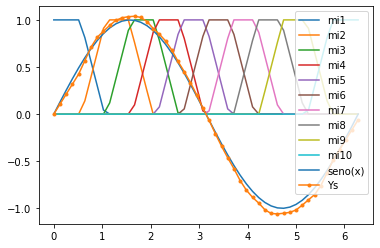

Erro quadrático médio EQM: 0.00186


In [80]:
mi1 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_1, limite_superior_1, direc = 'right')
mi2 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_2, limite_superior_2, direc = 'both')
mi3 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_3, limite_superior_3, direc = 'both')
mi4 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_4, limite_superior_4, direc = 'both')
mi5 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_5, limite_superior_5, direc = 'both')
mi6 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_6, limite_superior_6, direc = 'both')
mi7 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_7, limite_superior_7, direc = 'both')
mi8 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_8, limite_superior_8, direc = 'both')
mi9 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_9, limite_superior_9, direc = 'both')
mi10 = gera_funcao_pertinencia_triangular(entrada_x.copy(), limite_inferior_10, limite_superior_10, direc = 'left')
mi = [mi1, mi2, mi3, mi4, mi5, mi6, mi7, mi8, mi9, mi10]    
    
    
    
    

Ys = gera_Ys(yi, mi)
eqm = EQM(seno_x, Ys)

print('Aproximação triangular: ')
plot(entrada_x, seno_x, Ys, mi, yi)
print('Erro quadrático médio EQM: {:.5f}'.format(eqm))



Função de pertinência do tipo: Gaussiana

Aproximação gaussiana: 


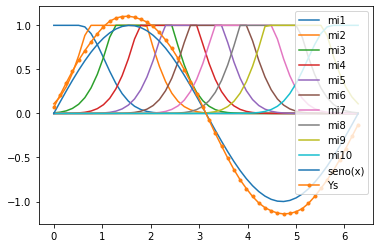

Erro quadrático médio EQM: 0.01321


In [81]:
mi1 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_1, limite_superior_1, direc = 'right')
mi2 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_2, limite_superior_2, direc = 'both')
mi3 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_3, limite_superior_3, direc = 'both')
mi4 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_4, limite_superior_4, direc = 'both')
mi5 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_5, limite_superior_5, direc = 'both')
mi6 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_6, limite_superior_6, direc = 'both')
mi7 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_7, limite_superior_7, direc = 'both')
mi8 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_8, limite_superior_8, direc = 'both')
mi9 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_9, limite_superior_9, direc = 'both')
mi10 = gera_funcao_pertinencia_gaussiana(entrada_x.copy(), limite_inferior_10, limite_superior_10, direc = 'left')
mi = [mi1, mi2, mi3, mi4, mi5, mi6, mi7, mi8, mi9, mi10]       


Ys = gera_Ys(yi, mi)
eqm = EQM(seno_x, Ys)

print('Aproximação gaussiana: ')
plot(entrada_x, seno_x, Ys, mi, yi)
print('Erro quadrático médio EQM: {:.5f}'.format(eqm))


### Questão 4 - Problema da gorjeta

In [82]:
# 1) se o serviço é ruim ou a comida é de mé qualidade, então a gorjeta é pequena.
# 2) se o serviço é bom então a gorjeta é média.
# 3) se o serviço é excelente ou a comida é deliciosa, então a gorjeta é generosa.

# media = 15%
# generosa = 25%
# pequena = 25%
#queremos modelar o gráfico passado

# primeira regra
#serviço ruim OU comida ruim -> gorjeta pequena
# (servico ruim) s-norma (comida-ruim) 
 

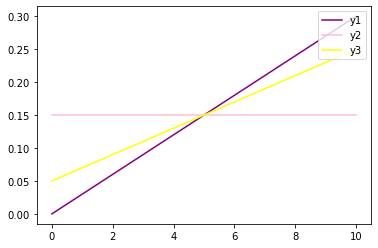

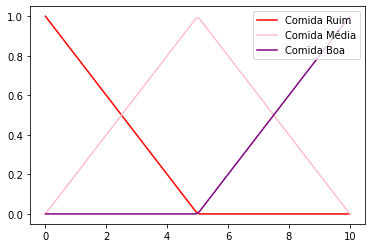

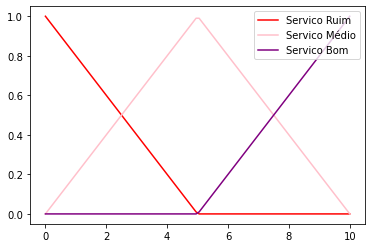

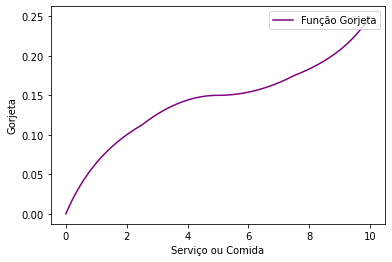

In [83]:
def gera_funcao(y , pesos):
    n_samples = len(y[0])
    n_condi = len(y)
    Y = []
    
    for n in range(n_samples):
        vp = 0
        norm = 0
        for i in range(n_condi):
            norm += pesos[i][n]
            vp += pesos[i][n] * y[i][n]
        
        Y.append(vp/norm)
    return np.array(Y)


comida = np.linspace (0,1,11)
servico = np.linspace (0,1,11)
x = np.linspace (0,10,100)


#quantas retas preciso?
# 3 retas para aproximar
# y_1 
#vai de (0,0) a (5,0.15)
#0.15y=5x
y_1=.03*x
y_2 = np.array([0.15]*len(x)) 
# y_3 
#vai de (5,0.15) a (10, 0.25)
#m= 0.10/5=0.2
y_3 = (0.02*(x))+0.05
#retas a serem aproximadas
plt.plot(x,y_1, label="y1", color = 'purple')
plt.plot(x,y_2, label="y2", color = 'pink')
plt.plot(x,y_3, label="y3", color = 'yellow')
plt.legend(loc="upper right")
plt.show()



#seguindo as dicas de trimificação do prof
#temos 3 graus diferentes de qualidade de comida aqui definidos
c1 = fuzz.trimf(x, [0,0,5])
c2 = fuzz.trimf(x, [0,5,10])
c3 = fuzz.trimf(x, [5,10,10])
plt.plot(x,c1, label="Comida Ruim", color='r')
plt.plot(x,c2, label="Comida Média", color = 'pink')
plt.plot(x,c3, label="Comida Boa", color = 'purple')
plt.legend(loc="upper right")
plt.show()


#graus de servico
s1 = fuzz.trimf(x, [0,0,5])
s2 = fuzz.trimf(x, [0,5,10])
s3 = fuzz.trimf(x, [5,10,10])
plt.plot(x,c1, label="Servico Ruim", color='r')
plt.plot(x,c2, label="Servico Médio", color = 'pink')
plt.plot(x,c3, label="Servico Bom", color = 'purple')
plt.legend(loc="upper right")
plt.show()



#condições indicadas pelo trabalho 
#com a fuzzy podemos apenas somar aqui
w1_f = c1+s1
w2_f = c2+s2
w3_f = c3+s3

w1_f = np.array([1 if i>1 else i for i in w1_f])
w3_f = np.array([1 if i>1 else i for i in w3_f])


y = [y_1,y_2,y_3]
w = [w1_f, w2_f, w3_f]
Y = gera_funcao(y , w)

plt.plot(x,Y, label="Função Gorjeta", color = 'purple')
plt.xlabel("Serviço ou Comida")
plt.ylabel("Gorjeta")
plt.legend(loc="upper right")
plt.show()


Podemos perceber que o gráfico obtido, da função gorjeta é bem semelhante ao gráfico passado que queriamos aproximar inicialmente. Para isso, foi necessário fazer a aproximação por 3 retas, demonstradas no primeiro gráfico plotado. A equação dessas retas foi obtida analiticamente, pois a função de aproximação já tem elas como premissa, dado o formato esperado de função gorjeta. Vale ressaltar que, por mais que elas cruzem o mesmo ponto no gráfico, o peso atribuído a elas, pelas funções de pertinência posteriormente obtidas, fará com que a soma se mantenha no formato esperado.

Posteriormente, foram plotadas as pertinências de cada situação de comida e serviço, usando a triangulação sugerida pelo professor, e também utilizada em outras questões. Aqui, devido ao uso do toolbox do scikit-fuzzy, os pesos p e q de cada função de pertinência não tiveram que ser calculados, pois já são suportadas operações entre grupos fuzzy no próprio toolbox. Assim, pode-se perceber que os valores são apenas somados.

Com isso, foi gerada a aproximação final da função Gorjeta pela soma ponderada das retas com os pesos calculados nas funções de pertinência. Essa soma ponderada é bem simples e pode ser verificada na função gera_funcao. Dessa maneira, temos uma função bem semelhante à apresentada na especificação. Posteriormente, ela pode ser utilizada para calcular valor escalar de gorjeta, dado uma entrada de qualidade de serviço e comida.